[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/3_ex_predictive_analytics.ipynb) 

# BADS Exercise 3 on the foundations of predictive analytics
The following exercise tasks revisit some concepts covered in [Tutorial 3 on predictive analytics](https://github.com/Humboldt-WI/bads/blob/master/tutorials/3_nb_predictive_analytics.ipynb) 
Much of the tutorial focused on linear regression. Let's revisit some standard practices in regression analysis. For the fun of it, we will consider another data set. Specifically, we will use a well-known data set associated with wine quality. The data set is available in the *UCI machine learning repository* at: https://archive.ics.uci.edu/ml/datasets/wine+quality. Spend a few minutes to familiarize yourself with the data. In a nutshell, wine quality is measured on a scale from 0 (basically toxic) to 10 (heaven in a glass) by means of a survey. Note that the survey used other labels. We take the liberty to describe the data in a more figurative way ;) 
The data also provides some feature values capturing various (e.g., chemical) characteristics of the wine. The feature  names are fairly self-explanatory. The goal is to understand how the characteristics determine perceived quality (i.e, the target variable. Strictly speaking, the scaling level of the target variable is ordinal and not numeric. However, for simplicity, we consider our task to be a regression task and use linear regression.  

## 1 Loading the data 
Load and take a look into the data. Print out the number of observations and examine descriptive statistics. Do you see any specific patters? Besides analyzing features individually by calculating descriptive statistics, also pay attention to the correlation between features and the target variable. Depending how advanced you are in your studies, can could also make use of some of the topics that we cover in [Tutorial 4 on data preparation](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb). 

In [1]:
#Networking and file management modules
import requests
from zipfile import ZipFile
from io import BytesIO
import csv
# DS modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

np.set_printoptions(suppress=True)
plt.style.use('seaborn')

In [2]:
url = 'http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip'
response = requests.get(url)

In [3]:
zip_file = ZipFile(BytesIO(response.content))
files = zip_file.namelist()
with zip_file.open(files[2]) as csvfile:   
    df = pd.read_csv(csvfile, encoding='utf8', sep=';')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


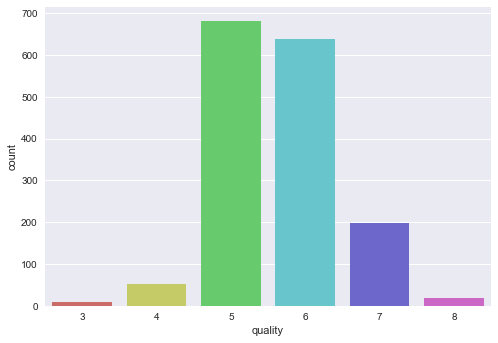

In [6]:
# Create descriptive statistics and state your findings
sns.countplot(x='quality', data = df, palette = 'hls')
plt.show()

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

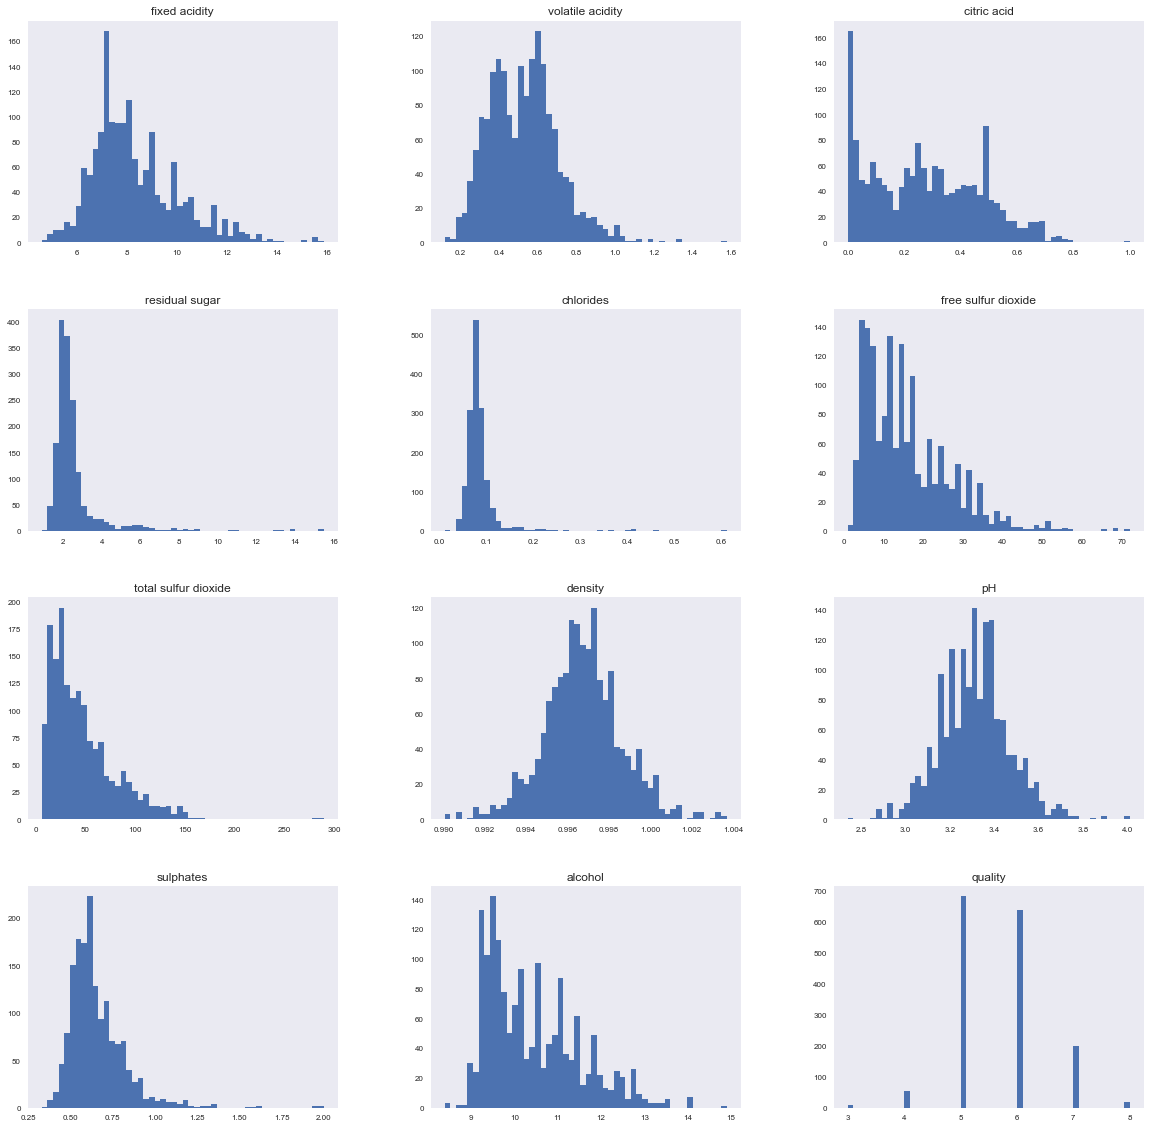

In [7]:
df.hist(figsize=(20,20), bins = 50, grid = False, xlabelsize = 8, ylabelsize = 8)

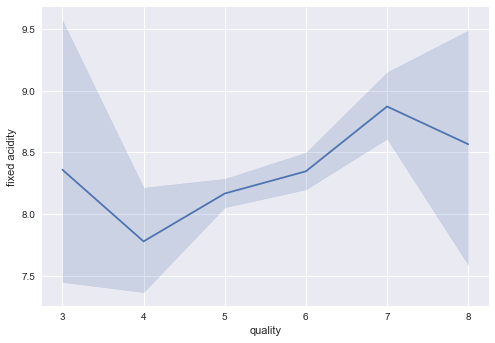

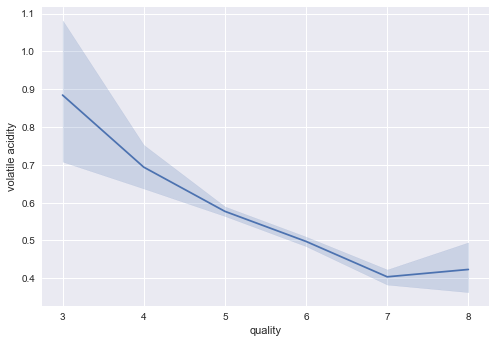

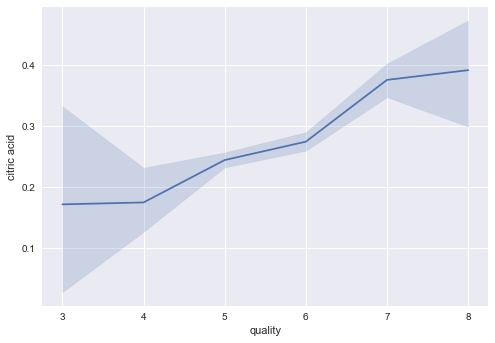

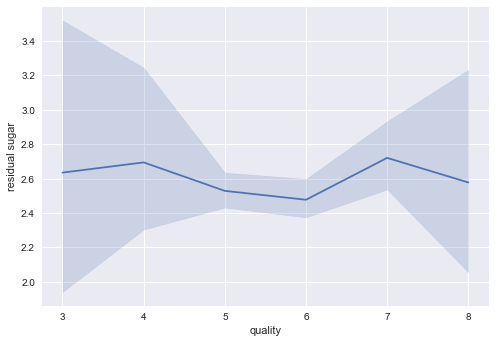

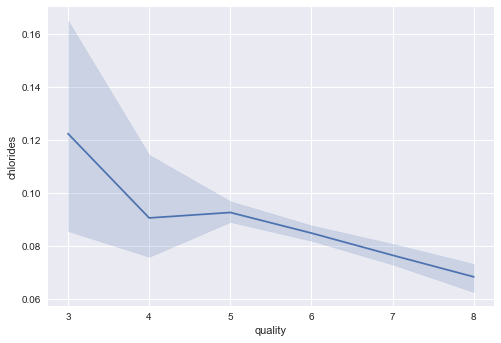

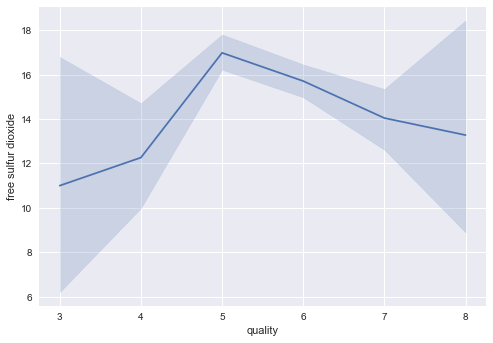

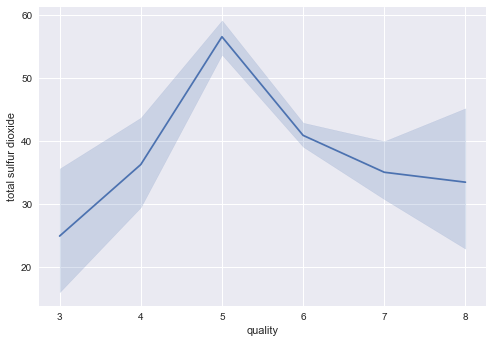

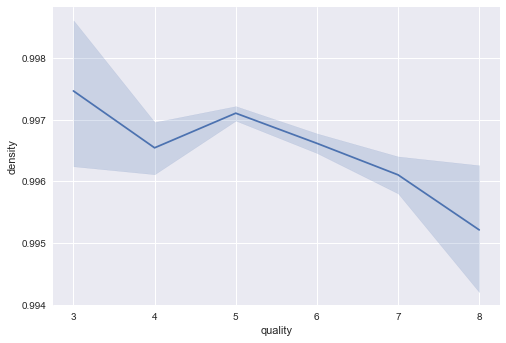

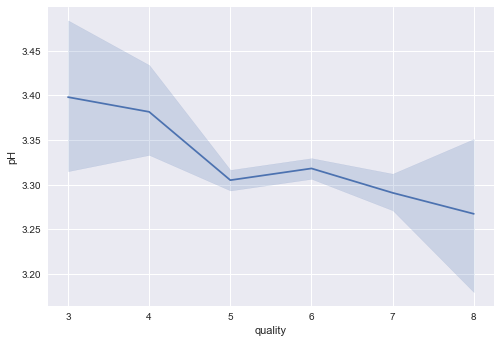

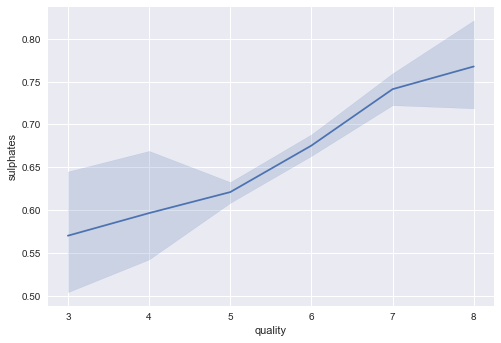

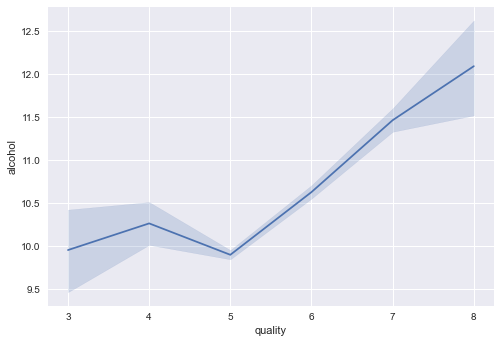

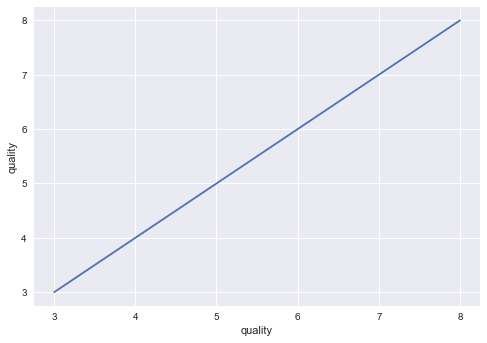

In [8]:
for i in df.columns:
    if i == 0: 
        continue
    sns.lineplot(x=df['quality'], y = df[i])
    plt.show()

# Conclusion descriptive: 
possible positve relationship between: citric acids, sulphates and alcohol

possible negative relationships with: volatile acidity, cholrides (density , pH)

In [9]:
# Analyze the correlation between features and the target

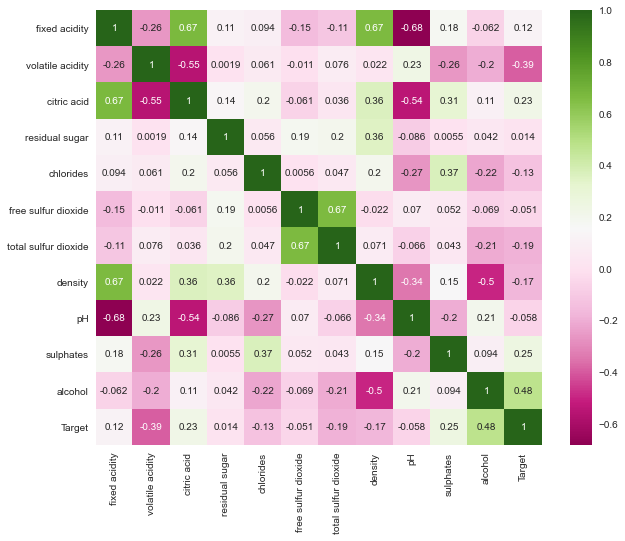

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

full_data = df.loc[:, df.columns != 'quality']

full_data['Target'] = df['quality']

corr = full_data.corr()

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap='PiYG');

## Analysis Correlation
ph seems to be highly negatively correlated with fixed acidity and citric acid
Additioanally, citric acidid is negatively correlated with volatile acitity and strongly positve correlated with fixed acidity
--> multicollinearity! since these values all correlate quite strong with each other, we might have to leave some out in further regressions

## 2 Regression analysis (basic)
Let's try to model the quality of wine (target)  using the data about it's chemical compounds (features). Build a simple linear regression using the `statsmodels` library. Start only with two components that seem to have most influence. You should have got some ideas which variables might be important from your previous analysis of the data. Produce a regression table and discuss the results. How well does your model explain the target?



In [11]:
# First regression using only two features
from sklearn.linear_model import LinearRegression

In [12]:
X = df[['alcohol', 'sulphates']]
y = df['quality']
lin = LinearRegression().fit(X,y)

print(lin.intercept_, lin.coef_)

1.374966738994324 [0.34604233 0.99409492]


## 3 Full regression analysis 
Let's now  try to use all our features. Re-run the regression and check whether its results have improved. Which features seem to play major role? Do you observe any irrelevant features? Did it match the guess we made after looking at correlation? Why could that be? Try out a few more variants of your regression model by discarding less informative features.  

In [13]:
# Codes for tasks 3.3
X = df.loc[:, df.columns != 'quality']
y = df['quality']

lin = LinearRegression().fit(X,y)
print(lin.intercept_, lin.coef_)

21.965208449451815 [  0.02499055  -1.08359026  -0.18256395   0.01633127  -1.87422516
   0.00436133  -0.00326458 -17.88116383  -0.41365314   0.91633441
   0.2761977 ]


In [14]:
model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.108e+04
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:34:56   Log-Likelihood:                         -1569.7
No. Observations:                1599   AIC:                                      3161.
Df Residuals:                    1588   BIC:                                      3221.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [15]:
results.mse_resid

0.41993810484128147

In [16]:
features_tuned = ['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']  # reduced set of features

model_tuned = sm.OLS(y, X[features_tuned])  # re-estimate regression

results_tuned = model_tuned.fit()

print(results_tuned.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.717e+04
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:34:57   Log-Likelihood:                         -1582.5
No. Observations:                1599   AIC:                                      3179.
Df Residuals:                    1592   BIC:                                      3217.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [17]:
results_tuned.mse_resid  

0.425635842729698

## 4 Comparing regression models
Working on the previous tasks, you have created several regression models for the same data set. You would want to know which model is best for your data. Briefly state which regression statistics you consider to determine the most suitable model. Use this task as an opportunity for verifying that you are familiar with the statistics that the regression output table provides.  

Briefly state your answers to 3.4 as a bullet list:
- the inital regression with all features showed that some features are not significant, such as : fixed acity, residual sugar, free sulfur dioxide, total sulfur dioxide, therefore i dropped them from the second regression model. in doing so the Cond. No. decreased significantly due to less multicollinearity. 
- R Squared did not change at all. However, the F-Statistic value increased significantly, meaning that the chance that all regression coefficients are equal to zero is lower (was very high in the first place). 
- --> more predictive capability of the second model
- removing these features may reduce noise from the regression --> better predictions (supported by AIC and BIC, which roughly stayed the same )

## 5 Residual analysis
Having discussed the suitability of alternative regression models above, you will now be ready to pick your preferred model. Create a residual plot for this model. Briefly discuss the purposes of a residual plot and your findings.

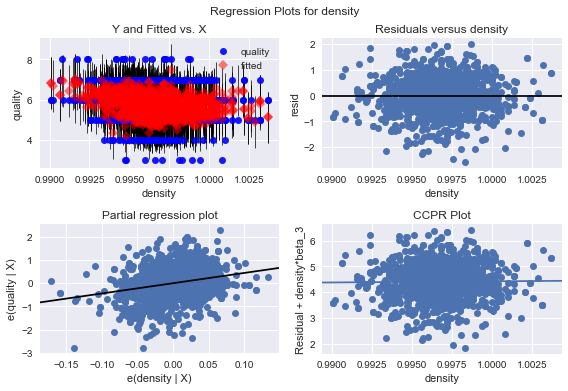

In [18]:
fig = plt.figure()
fig = sm.graphics.plot_regress_exog(results_tuned,'density', fig=fig)

**Your comments on the residual plot** 

In general, the purpose of a residual plot is:

With regard to the above residual plot, I conclude:

# Well done. You did great in solving all the exercises!